# [Sistemas de recomendación](https://en.wikipedia.org/wiki/Recommender_system)

## Es una subclase de [sistema de filtrado](https://en.wikipedia.org/wiki/Information_filtering_system) de información que busca predecir el 'rating' o la 'preferencia' que un usuario podría dar a un objeto.

### Los sistemas de recomendación usualmente hacen uso de [filtración colaborativa](https://en.wikipedia.org/wiki/Collaborative_filtering) y(o) [filtración basada en contenido](https://en.wikipedia.org/wiki/Knowledge-based_systems)(tambien conocida como acercamiento basado en personalidad) así como en otros sistemas como los basados en conocimientos.

-  El acercamiento mediante la filtración colaborativa construye un modelo de la conducta pasada de un sujeto(objetos previamente comprados o seleccionados y/o rankings numéricos dados esos objetos) así tambien como decisiones similares hechas por otros usuarios. Este modelo es entonces usado para predecir objetos(o rankings para objetos) que el usuario podría estar interesado.

- Los métodos de filtrado basados en contenido se basan en una descripción del elemento y un perfil de las preferencias del usuario.Estos métodos se adaptan mejor a situaciones en las que hay datos conocidos sobre un elemento (nombre, ubicación, descripción, etc.), pero no sobre el usuario. Los recomendadores basados en contenido tratan la recomendación como un problema de clasificación específico del usuario y aprenden un clasificador de los gustos y aversiones del usuario en función de las características del producto.

- Los sistemas actuales de recomendación usualmente combinan uno o más acercamientos en un sistema hibrido

- Los sistemas de recomendación son una buena alternativa a los algoritmos de busqueda ya que estos ayudan a encontrar objetos que no podrian ser encotrados de otra manera. 

# Content based recomender system

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [92]:
text = ["London Paris London”,”Paris Paris London"]

In [93]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(text)
count_matrix

<1x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [94]:
print(cv.get_feature_names())
print(count_matrix.toarray())

['london', 'paris']
[[3 3]]


In [50]:
similarity_scores = cosine_similarity(count_matrix)
print(similarity_scores)

[[1.]]


# Movies

In [51]:
df = pd.read_csv("movie_dataset.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
index                   4803 non-null int64
budget                  4803 non-null int64
genres                  4775 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4391 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null fl

In [53]:
features = ['keywords','cast','genres','director']

In [54]:
def combine_features(row):
    return row['keywords'] +" "+row['cast']+" "+row["genres"]+" "+row["director"]

In [55]:
for feature in features:
    df[feature] = df[feature].fillna('')

In [56]:
df["combined_features"] = df.apply(combine_features,axis=1)
#print('Palabras clave \n',df['keywords'])
#print('Actores\n',df['cast'])
#print('Generos\n',df['genres'])
#print('Directores\n',df['director'])
#print('Caracteristicas combinadas\n',df["combined_features"])

In [57]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"])
m = count_matrix.toarray()
print(count_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
cosine_sim = cosine_similarity(count_matrix)
print(cosine_sim)

[[1.         0.10540926 0.12038585 ... 0.         0.         0.        ]
 [0.10540926 1.         0.0761387  ... 0.03651484 0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.11145564 0.        ]
 ...
 [0.         0.03651484 0.         ... 1.         0.         0.04264014]
 [0.         0.         0.11145564 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.04264014 0.         1.        ]]


In [59]:
cosine_sim.shape

(4803, 4803)

In [60]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]

In [61]:
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

In [62]:
movie_user_likes = "Avatar"
movie_index = get_index_from_title(movie_user_likes)

In [63]:
similar_movies =  list(enumerate(cosine_sim[movie_index]))
#similar_movies

In [64]:
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]
#sorted_similar_movies

In [65]:
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>=10:
        break

Top 10 similar movies to Avatar are:

Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1
Star Trek Into Darkness
Star Trek Beyond
Alien
Lockout
Jason X
The Helix... Loaded
Moonraker


# Colaborative filtering based

In [66]:
ratings_data = pd.read_csv("ml-20m/ratings.csv")  
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [67]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [68]:
movie_names = pd.read_csv("ml-20m/movies.csv")  
movie_names.head()  

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [69]:
movie_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


In [70]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId')  

In [71]:
movie_data.head() 

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [72]:
movie_data.groupby('title')['rating'].mean().head()  

title
"Great Performances" Cats (1998)                               2.748387
#chicagoGirl: The Social Network Takes on a Dictator (2013)    3.666667
$ (Dollars) (1971)                                             2.833333
$5 a Day (2008)                                                2.871795
$9.99 (2008)                                                   3.009091
Name: rating, dtype: float64

In [73]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()  

title
Stealing a Nation (2004)                                 5.0
Human Behavior Experiments, The (2006)                   5.0
Boys Diving, Honolulu (1901)                             5.0
Rigoletto (1993)                                         5.0
Paying the Price: Killing the Children of Iraq (2000)    5.0
Name: rating, dtype: float64

In [74]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()  

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

In [75]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())  

In [76]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())  

In [77]:
ratings_mean_count.head()  

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",2.748387,155
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.833333,24
$5 a Day (2008),2.871795,39
$9.99 (2008),3.009091,55


In [ ]:
sns.set_style('dark')  
%matplotlib inline

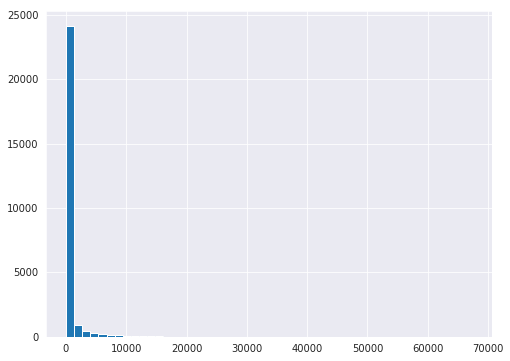

In [78]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)  

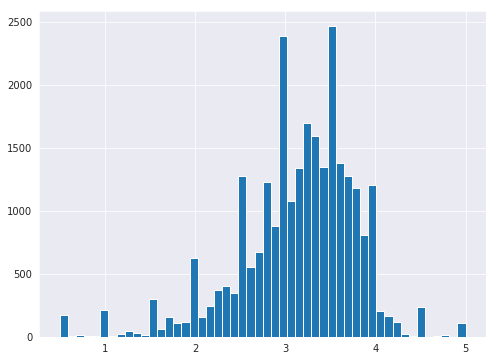

In [79]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True 
ratings_mean_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

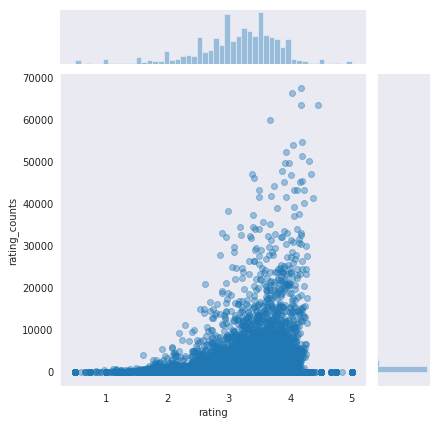

In [80]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

In [81]:
movie_data.shape

(20000263, 6)

In [82]:
movie_data=movie_data[:5000000]

In [83]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')

In [84]:
user_movie_rating.shape 

(138082, 377)

In [85]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

In [86]:
forrest_gump_ratings.head()  

userId
1    NaN
2    NaN
3    NaN
4    4.0
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [87]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])  
corr_forrest_gump.dropna(inplace=True)  
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)  

,Correlation
title,
Forrest Gump (1994),1.000000
Glory Daze (1995),0.434206
Saving Private Ryan (1998),0.374430
Mr. Holland's Opus (1995),0.364712
Braveheart (1995),0.350675
Titanic (1997),0.346272
"Shawshank Redemption, The (1994)",0.333162
"Patriot, The (2000)",0.325709
Big (1988),0.319637


In [88]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)  

,Correlation
title,
Forrest Gump (1994),1.000000
Glory Daze (1995),0.434206
Saving Private Ryan (1998),0.374430
Mr. Holland's Opus (1995),0.364712
Braveheart (1995),0.350675
Titanic (1997),0.346272
"Shawshank Redemption, The (1994)",0.333162
"Patriot, The (2000)",0.325709
Big (1988),0.319637


In [89]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  
corr_forrest_gump.head()

,Correlation,rating_counts
title,,
1984 (Nineteen Eighty-Four) (1984),0.088129,3407
2001: A Space Odyssey (1968),0.041284,25253
2010: The Year We Make Contact (1984),0.203496,4143
28 Days (2000),0.173327,4670
28 Days Later (2002),0.103509,12170


In [90]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()  

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,66172
Glory Daze (1995),0.434206,114
Saving Private Ryan (1998),0.374430,37110
Mr. Holland's Opus (1995),0.364712,19381
Braveheart (1995),0.350675,53769
